In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.model_selection import train_test_split

### ロジスティック回帰
### 線形サポートベクタマシン

ロジスティック回帰と線形サポートベクタマシンにおける正則化の強度を決定するパラメータはCと呼ばれる<br>
Cが大きくなると正則化が弱まる（訓練データに対しての適合度を上げようとする）<br>
#### 正則化
- モデルが簡潔になる（係数が0に近いかもしくは0）
- 訓練データに対しての適合率が低くなる
- テストデータに対しての適合率が高くなる

C:\ForDevelop\anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
C:\ForDevelop\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


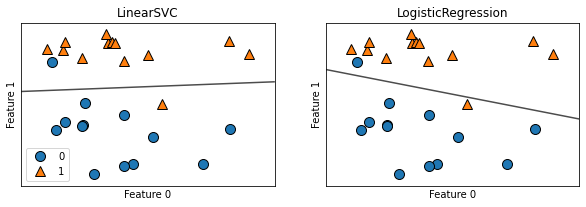

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
axes[0].legend()

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)
logreg = LogisticRegression().fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.9577464788732394
0.9370629370629371


C:\ForDevelop\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In[6] デフォルトのC=1は、訓練セットとテストセットの双方で95％ととてもいい性能<br>
しかし訓練セットとテストセットの精度がとても近いということは、**適合不足**の可能性が高い

In [9]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print(logreg100.score(X_train, y_train))
print(logreg100.score(X_test, y_test))

0.9647887323943662
0.9370629370629371


C:\ForDevelop\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=100にすると訓練セット精度が向上し、テストセット精度もわずかに向上している

In [10]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.9577464788732394
0.9370629370629371


C:\ForDevelop\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C=0.01にすると、すでに適語不足だったモデルから図2-1のさらに左側に寄ってしまい、訓練セット精度もテストセット精度もデフォルトパラメータより悪くなっている

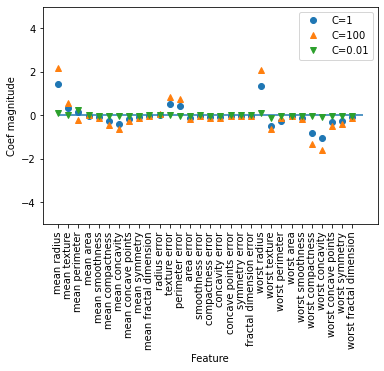

In [11]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel('Feature')
plt.ylabel('Coef magnitude')
plt.legend()

訓練精度 C=0.001: 0.93
テスト精度 C=0.001: 0.92
訓練精度 C=1.000: 0.96
テスト精度 C=1.000: 0.94
訓練精度 C=100.000: 0.96
テスト精度 C=100.000: 0.94


C:\ForDevelop\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ForDevelop\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

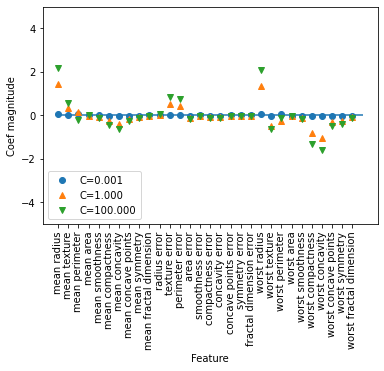

In [12]:
for C, maker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C).fit(X_train, y_train)
    print('訓練精度 C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_train, y_train)))
    print('テスト精度 C={:.3f}: {:.2f}'.format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, maker, label='C={:.3f}'.format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel('Feature')
plt.ylabel('Coef magnitude')
plt.ylim(-5, 5)
plt.legend(loc=3)

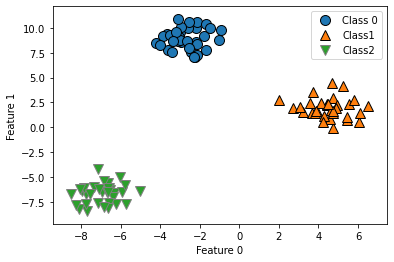

In [13]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend(['Class 0', 'Class1', 'Class2'])

In [14]:
linear_svm = LinearSVC().fit(X, y)
print('係数配列の形状: ',linear_svm.coef_.shape)
print('切片配列の形状: ',linear_svm.intercept_.shape)

係数配列の形状:  (3, 2)
切片配列の形状:  (3,)


### ナイーブベイズクラス分類器
訓練が線形モデルよりも高速だが、汎化性能はロジスティック回帰や線形サポートベクタマシンよりも劣る

In [15]:
# それぞれ4つの2値特徴量を持つ4つのデータポイント、2つのクラス0と1がある
X = np.array([[0, 1, 0, 1],[1, 0, 1, 1],[0, 0, 0, 1],[1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])
counts = {}
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print(counts)

{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


### 決定木（クラス分類）

In [22]:
!pip install graphviz

In [16]:
from sklearn.tree import DecisionTreeClassifier
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

1.0
0.9370629370629371


In [17]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.9882629107981221
0.951048951048951


In [18]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', class_names=['maligant', 'benigh'], feature_names=cancer.feature_names, impurity=False, filled=True)

In [19]:
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
    graphviz.Source(dot_graph)

In [20]:
print(tree.feature_importances_)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


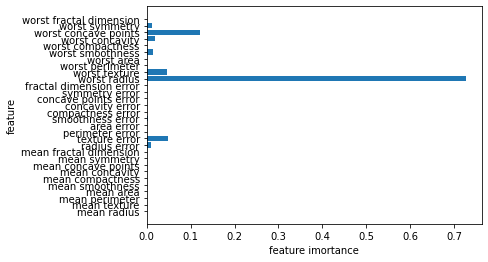

In [21]:
def plot_feature_importances_cancer(model):
    #
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('feature imortance')
    plt.ylabel('feature')
plot_feature_importances_cancer(tree)

In [22]:
n_features = cancer.data.shape[1]
# print(cancer.data)
print(cancer.data.shape)
print(n_features)

(569, 30)
30


### 決定木（回帰）
**メリット**
- 結果のモデルが容易に可視化可能（専門家でなくても理解しやすい）
- データのスケールに対して不変（特徴量の正規化や標準化が不要）

**デメリット**
- 事前枝刈りを行っても過剰適合しやすく、汎化性能が低い

Text(0, 0.5, 'price')

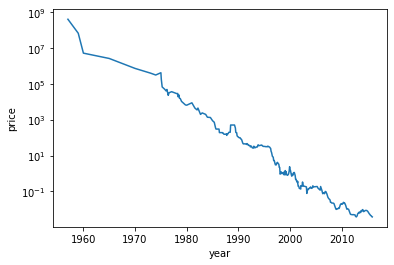

In [24]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('year')
plt.ylabel('price')

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# 過去のデータを用いて2000年以降の価格を予想する
data_train = ram_prices[ram_prices.date<2000]
data_test = ram_prices[ram_prices.date>=2000]

# 日付に基づいて価格を予想
X_train = data_train.date[:, np.newaxis]
# データとターゲットの関係を単純にするために対数変換
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# すべての価格を予想
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 対数変換をキャンセルするために逆変換
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

<ipython-input-31-af51218d76eb>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = data_train.date[:, np.newaxis]
<ipython-input-31-af51218d76eb>:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_all = ram_prices.date[:, np.newaxis]


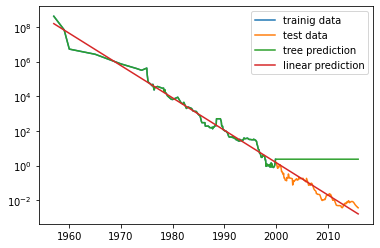

In [32]:
plt.semilogy(data_train.date, data_train.price, label='trainig data')
plt.semilogy(data_test.date, data_test.price, label='test data')
plt.semilogy(ram_prices.date, price_tree, label='tree prediction')
plt.semilogy(ram_prices.date, price_lr, label='linear prediction')
plt.legend()

In [34]:
print(ram_prices.date)
print('------------------------')
print(ram_prices.date[:, np.newaxis])

0      1957.00
1      1959.00
2      1960.00
3      1965.00
4      1970.00
        ...   
328    2015.58
329    2015.67
330    2015.75
331    2015.83
332    2015.92
Name: date, Length: 333, dtype: float64
------------------------
[[1957.  ]
 [1959.  ]
 [1960.  ]
 [1965.  ]
 [1970.  ]
 [1973.  ]
 [1974.  ]
 [1975.  ]
 [1975.08]
 [1975.25]
 [1975.75]
 [1976.  ]
 [1976.17]
 [1976.42]
 [1976.58]
 [1977.08]
 [1978.17]
 [1978.25]
 [1978.33]
 [1978.5 ]
 [1978.58]
 [1978.75]
 [1979.  ]
 [1979.75]
 [1980.  ]
 [1981.  ]
 [1981.58]
 [1982.  ]
 [1982.17]
 [1982.67]
 [1983.  ]
 [1983.67]
 [1984.  ]
 [1984.58]
 [1985.  ]
 [1985.33]
 [1985.42]
 [1985.5 ]
 [1985.58]
 [1985.67]
 [1985.83]
 [1985.92]
 [1986.  ]
 [1986.08]
 [1986.17]
 [1986.25]
 [1986.33]
 [1986.42]
 [1986.5 ]
 [1986.58]
 [1986.67]
 [1986.75]
 [1986.92]
 [1987.  ]
 [1987.08]
 [1987.17]
 [1987.25]
 [1987.33]
 [1987.42]
 [1987.5 ]
 [1987.58]
 [1987.67]
 [1987.75]
 [1987.83]
 [1987.92]
 [1988.  ]
 [1988.08]
 [1988.17]
 [1988.33]
 [1988.42]


<ipython-input-34-6891e9a78896>:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  print(ram_prices.date[:, np.newaxis])


### ランダムフォレスト
決定木の過剰適合の問題に対応する方法の1つ<br>
少しずつ異なる決定木をたくさん集め、その結果の平均を取ることで過剰適合の度合いを減らす<br>
回帰でもクラス分類でも、ランダムフォレストが現在最も広く使われている機械学習手法となっている
#### 重要なパラメータ
|パラメータ名|機能|
|-|-|
|n_estimators|ランダムフォレスト生成に集める決定木の数<br>値が大きいほど過剰適合が低減されアンサンブルが頑健になる|
|max_features|個々の決定木を生成する際の特徴量の数<br>値が小さいほど過剰適合が低減するが、<br>分岐時に使う特徴量選択に選択肢が少なくなり、<br>決定木をかなり深く作らないとデータに適合できない<br>一般にはデフォルト値を使うとよい|
|max_depth|事前枝刈りパラメータの一つ<br>値が小さいほど過剰適合が低減する|

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

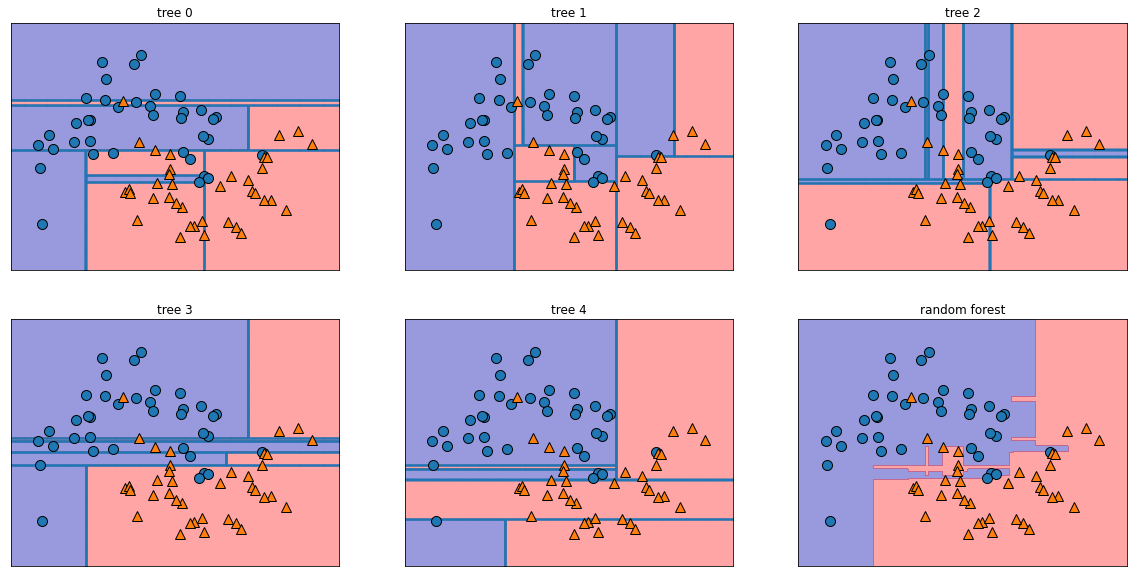

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title('tree {}'.format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1,-1], alpha=0.4)
axes[-1,-1].set_title('random forest')
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1],y_train)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

1.0
0.972027972027972


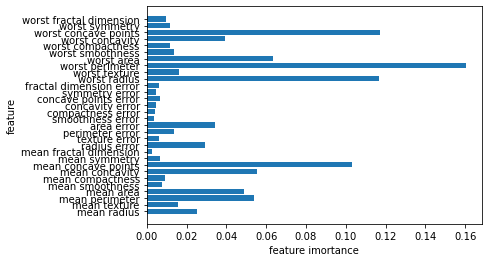

In [42]:
plot_feature_importances_cancer(forest)

### 勾配ブースティング回帰木
決定木の過剰適合の問題に対応する方法の1つ<br>
1つ前の決定木の誤りを次の決定木が修正するようにして決定機を順に作っていく
#### 重要なパラメータ
|パラメータ名|機能|
|-|-|
|n_estimators|ランダムフォレスト生成に集める決定木の数<br>値が大きいほど過剰適合が低減されアンサンブルが頑健になる<br>ランダムフォレストでは大きければ大きいほどよかったが、<br>勾配ブースティングでは値を大きくし過ぎると<br>複雑なモデルを許容することになり過剰学習を招く|
|leatning_rate|個々の決定木がそれまでの決定木の誤りを補正する度合い<br>|
|max_depth|事前枝刈りパラメータの一つ<br>値が小さいほど過剰適合が低減する<br>ランダムフォレストと比べ非常に小さく設定される<br>深さが5以上になることはあまりない|

In [43]:
# 訓練セットに対しての精度が100%になっているので、おそらく過剰適合している
# デフォルトでは深さ3の決定木が100個作られ、学習率は0.1となる
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

1.0
0.965034965034965


In [44]:
# 過剰適合を低減するためにパラメータを調節する
# max_depth = 1
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

0.9906103286384976
0.972027972027972


In [45]:
# 過剰適合を低減するためにパラメータを調節する
# learning_rate = 0.01
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

0.9882629107981221
0.965034965034965


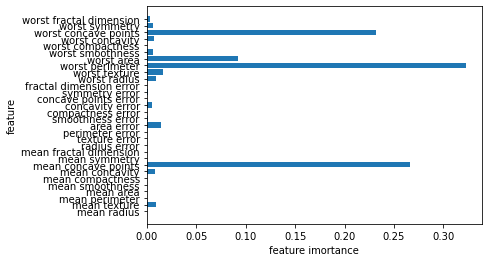

In [46]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

### カーネル法を用いたサポートベクタマシン
線形サポートベクタマシンの拡張

Text(0, 0.5, 'feature 0')

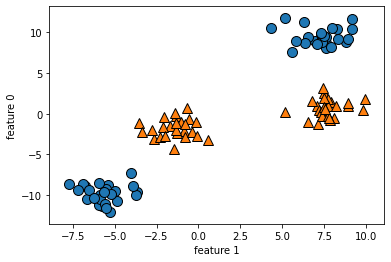

In [49]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('feature 1')
plt.ylabel('feature 0')

C:\ForDevelop\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, 'feature 1')

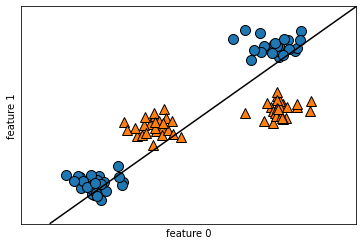

In [50]:
# 線形モデルだと、下図のように上手く分類出来ない
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0.5, 0, 'feature 1 ** 2')

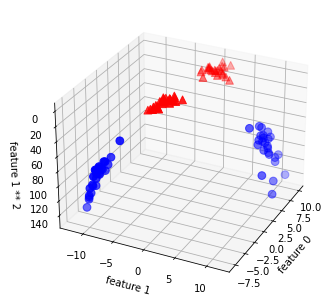

In [54]:
# 入力特徴量 feature1**2 を加えて3次元のデータに拡張
X_new = np.hstack([X, X[:, 1:]**2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel('feature 0')
ax.set_ylabel('feature 1')
ax.set_zlabel('feature 1 ** 2')

In [56]:
print(X_new[:, 0])

[-1.72161036 -3.6573384   7.0778163  -1.36579859 -2.66521206  7.63027116
 -5.27144331  7.91767139 -1.41284184 -1.01519039  8.2634157   6.96767867
 -0.84779249  7.48006237  7.71454967 -7.74064658 -5.41087235 -2.27579204
 -1.25668449  7.61227907  8.81545663  7.1895354   7.40292703  5.17209648
 -2.10476115  6.5342397   7.59635095 -0.6560501  -4.86090778  8.90864428
  8.09770696 -0.79757091  9.92897802 -1.36106796  5.5987887  -4.98457333
 -0.57094074  6.28516091  7.46833627 -5.54704895  7.71891403 -0.35871708
 -3.71313291 -5.73423505  7.29433984 -5.91698308  8.23775366  8.91111219
  7.31164869  7.49954     7.15741276 -5.24568764  7.40565933  8.32813617
 -0.05919026 -5.8559969  -5.9232326  -6.65506667  7.49985237 -2.04751119
 -3.57485395 -5.89890454  9.85640178 -6.78464252  6.34526126  6.77299778
 -1.45137298  7.88011867  9.19642422  7.94310647  6.57242965 -6.87196564
  7.31294296  5.19332032  7.09022949  9.17061801 -1.34457765 -5.59306958
 -2.76538887  7.38527197 -6.55585067  5.82259795 -0

C:\ForDevelop\anaconda\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, 'feature1 ** 2')

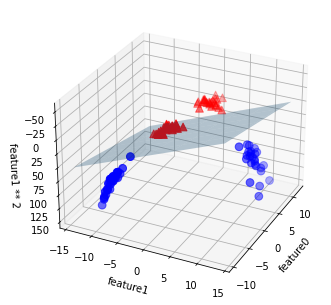

In [59]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min()-2, X_new[:, 0].max()+2, 50)
yy = np.linspace(X_new[:, 1].min()-2, X_new[:, 1].max()+2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0]*XX + coef[1]*YY + intercept)/-coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r',marker='^', cmap=mglearn.cm2, s=60)
ax.set_xlabel('feature0')
ax.set_ylabel('feature1')
ax.set_zlabel('feature1 ** 2')

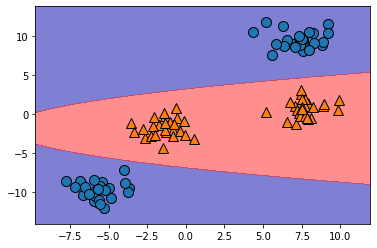

In [60]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

Text(0, 0.5, 'feature1')

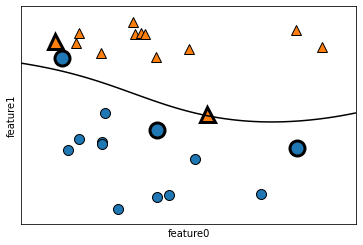

In [63]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('feature0')
plt.ylabel('feature1')

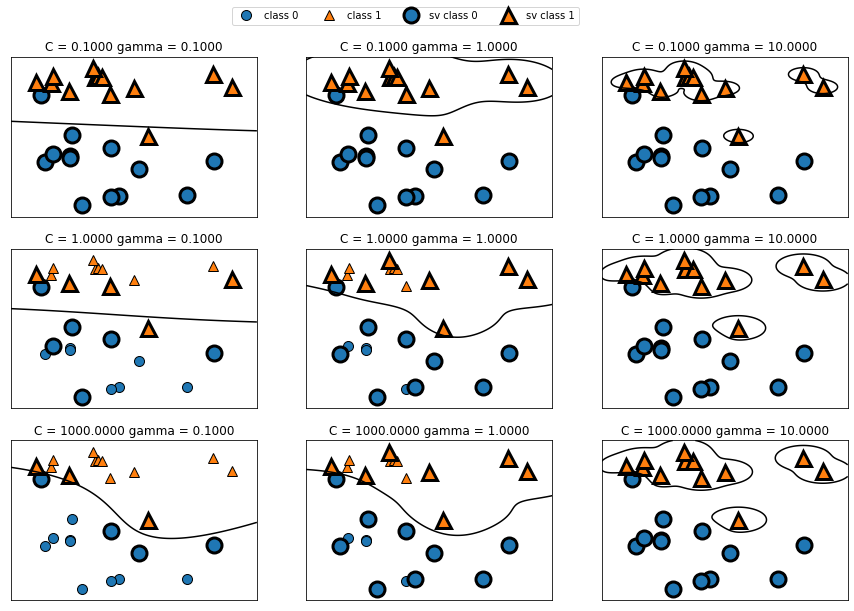

In [66]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(['class 0', 'class 1', 'sv class 0', 'sv class 1'], ncol=4, loc=(0.9, 1.2))

In [68]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.903755868544601
0.9370629370629371


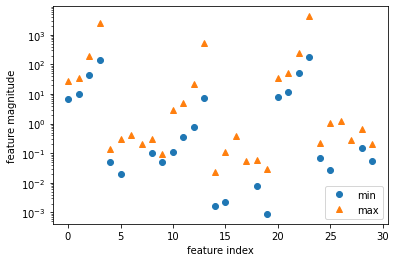

In [70]:
plt.plot(X_train.min(axis=0), 'o', label='min')
plt.plot(X_train.max(axis=0), '^', label='max')
plt.legend(loc=4)
plt.xlabel('feature index')
plt.ylabel('feature magnitude')
plt.yscale('log')